# ИУ5-62Б Нырков Илья рубежный контроль №1 по "Технологии машинного обучения" 

| Номер варианта | Номер задачи | Номер набора данных, указанного в задаче |
| -------------- | ------------ | ---------------------------------------- |
| 14             | 2            | 6                                        |

Дополнительное задание: для произвольной колонки данных построить гистограмму.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Admission_Predict.csv', sep=",")

В датасете содержится основная информация о поступающих в магистратуру выпускниках.

# Основные характеристики датасета

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Значения колонок
* Serial No. - серийный номер студента (нам не интересен в данном случае)
* GRE Score - количество баллов за экзамен GRE, от 0 до 340 баллов (целые числа)
* TOEFL Score - количество баллов за экзамен на знание Английского языка TOEFL, от 0 до 120 баллов (целые числа)
* University rating - рейтинг университета, от 1 до 5 (целые числа)
* Statement of Purpose and Letter of Recommendation Strength - заявление о целях студентах и сила его рекоммендаций, от 0 до 5 (целые числа)
* Undergraduate GPA - средний балл студента, от 0 до 10 (целые числа)
* Research - есть ли опыт в научных исследованиях, 0 или 1
* Chance of admit - шанс принятия студента в университет, 0 до 1 (действительные числа)



## Типы данных колонок

In [4]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

## Наличие пустых значений

In [5]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


Пропусков не обнаружено

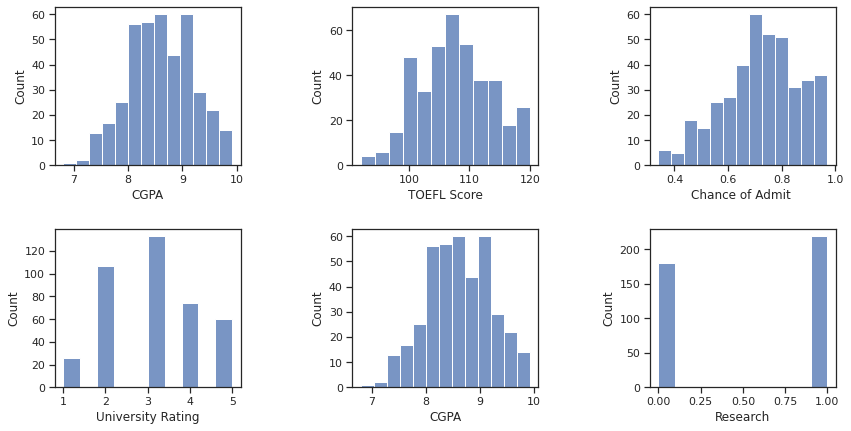

In [48]:
_, axes = plt.subplots(2, 3, figsize= (14, 7))
sns.histplot(data['CGPA'], ax=axes[0][0])
sns.histplot(data['TOEFL Score'], ax=axes[0][1])
sns.histplot(data['Chance of Admit '], ax=axes[0][2])
sns.histplot(data['University Rating'], ax=axes[1][0])
sns.histplot(data['CGPA'], ax=axes[1][1])
sns.histplot(data['Research'], ax=axes[1][2])
plt.subplots_adjust(hspace=0.4, wspace=0.6)
plt.show()              

## Основные статистические характеристки набора данных

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Корелляционный анализ
ключевым признаком в данном датасете является Chance of admit

In [7]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Построим корреляционную матрицу, убрав поля Serial No (так как это просто счётик, который нас не интересует) и поле прогнозируемую величину (Serial No.).
Так же построим матрицу корреляции признаков и прогнозируемой величины (Serial No).

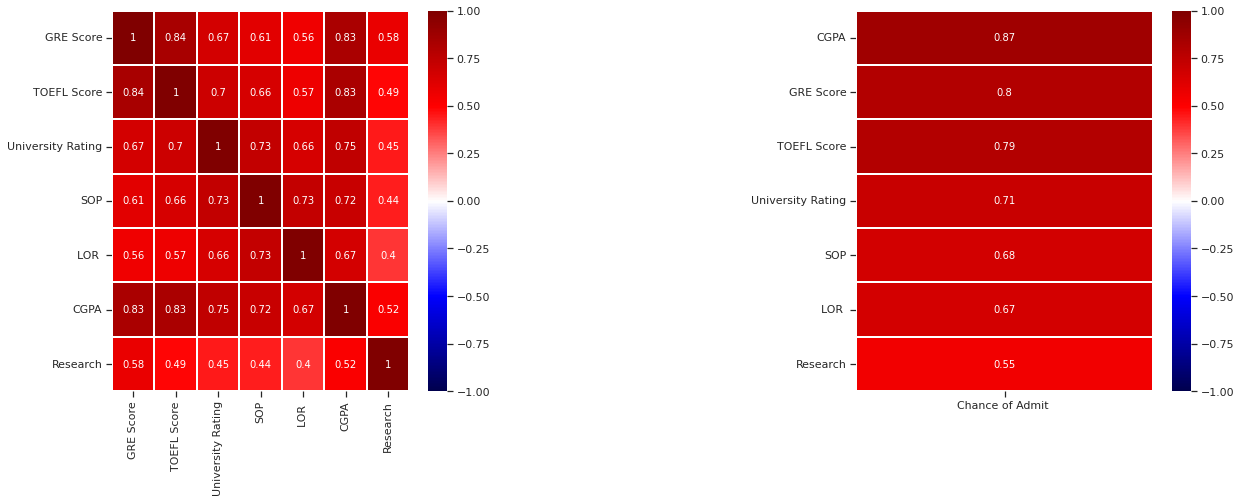

In [38]:
_, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.heatmap(data.drop(['Chance of Admit ', 'Serial No.'], axis=1).corr(), annot=True, vmin = -1, vmax = 1, cmap='seismic', linewidth=1, ax = axes[0])
sns.heatmap(pd.DataFrame(data.drop('Serial No.', axis=1).corr()['Chance of Admit '].sort_values(ascending=False)[1:]),
            annot=True, vmin=-1, vmax=1, cmap='seismic', linewidth=1, ax=axes[1])
plt.subplots_adjust(wspace=1)
plt.show()


Из матрицы корелляции признаков можно выделить пары признаков, обладающих сильной корреляцией.
* Gre Score и CGPA - 0.83
* CGPA и TOEFL Score - 0.83
* Gre Score и TOEFL Score - 0.84

Одновременное использование этих пар признаков в моделях машинного обучения привело бы к мультиколлинеарности, следует оставить только один признак этого множества. Из второй матрицы видно, что наибольшей корреляции с прогнозируемой величиной обладает признак CGPA, поэтому логичнее всего оставить этот признак, так как он будет наибольшим вкладом в обучение модели машинного обучения. Остальные признаки тоже обладают средней, сильной корреляциями, оставляем их и убираем признаки TOEFL Score, Gre Score.

Таким образом, в результате корреляционного анализа было принято решено использовать для обучения модели машинного обучения следующие признаки: CGPA, University Rating, SOP, LOR, Research.